In [34]:
import pandas as pd
import seaborn as sns
%matplotlib inline

In [16]:
URL = "http://www.aso.fr/massevents/resultats/ajax.php?v=1456754529&course=ocr16&langue=fr&version=3&action=search&limiter[numpage]=%s"
df = pd.DataFrame()
for i in xrange(1,90):
    url = URL % i
    df = pd.concat([df, pd.read_html(url)[0]])

In [21]:
df.columns = ['Classement', 'Temps', 'Dossard', 'Nom', 'Prenom', 'Photos', '-']

In [75]:
df.reset_index(inplace=True)

In [23]:
df[df.Nom == 'CHAMI']

,Classement,Temps,Dossard,Nom,Prenom,Photos,-
13,2964,01:00:35,15102,CHAMI,Marah,NaN,Mon rÃ©sultat en dÃ©tails


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4450 entries, 0 to 49
Data columns (total 7 columns):
Classement    4450 non-null int64
Temps         4450 non-null object
Dossard       4450 non-null int64
Nom           4450 non-null object
Prenom        4450 non-null object
Photos        0 non-null float64
-             4450 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 278.1+ KB


In [37]:
from datetime import datetime, timedelta
def parse_temps(temps):
    t = datetime.strptime(temps,"%H:%M:%S")
    return timedelta(hours=t.hour, minutes=t.minute, seconds=t.second)
df['Temps_Parsed'] = df['Temps'].apply(parse_temps)
df['Temps_Min'] = df['Temps_Parsed'].apply(lambda dt: dt.total_seconds()/60.)

In [77]:
df.ix[df.Temps_Parsed.argmin()]

level_0                                 0
index                                   0
Classement                              1
Temps                            00:33:01
Dossard                                13
Nom                              BENICHOU
Prenom                             Thomas
Photos                                NaN
-               Mon rÃ©sultat en dÃ©tails
Temps_Parsed              0 days 00:33:01
Temps_Min                         33.0167
Name: 0, dtype: object

In [31]:
df['Temps_Parsed'].describe()

count                      4450
mean     0 days 00:56:51.576404
std      0 days 00:10:20.242720
min             0 days 00:33:01
25%             0 days 00:49:29
50%             0 days 00:56:17
75%             0 days 01:03:18
max             0 days 02:40:05
Name: Temps_Parsed, dtype: object

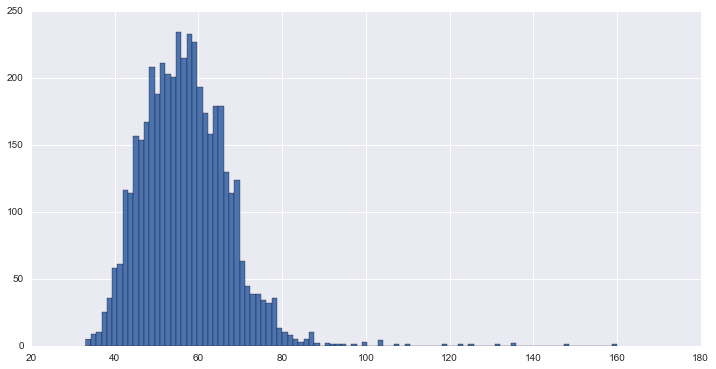

In [42]:
df['Temps_Min'].hist(bins=100, figsize=(12, 6))

In [47]:
len(df.Prenom.unique())

1517

In [57]:
df.Prenom.value_counts().sort_values(ascending=False).cumsum()

Julien               57
Nicolas             112
Olivier             156
Laurent             198
Guillaume           240
Thomas              280
Vincent             315
Christophe          347
Philippe            379
Marie               411
Francois            441
Sebastien           471
Frederic            500
Alexandre           529
David               558
Romain              587
Sophie              616
Claire              645
Delphine            673
Benjamin            701
Antoine             729
Pierre              756
Camille             783
Mathieu             809
Marion              834
Stephane            858
Bruno               881
Eric                903
Arnaud              925
Julie               947
                   ... 
Shadi              4421
Anni               4422
JOHAN              4423
Arnauld            4424
Nida               4425
Gwenael            4426
Jean-louis         4427
ODILE              4428
FERYEL             4429
Gilbert            4430
ADRIEN          

In [ ]:
df.Prenom.value_counts().sort_values

In [ ]:
df.Prenom.value_counts().sort_values